<a href="https://colab.research.google.com/github/Shiroi11/Colab-Assignments/blob/main/Colab_5th_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Setting the Random Seed Generator:
tf.random.set_seed(42)

In [ ]:
# Importing and Splitting the Data:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Preprocessing the Target and Features:
x_train, x_test = x_train/255, x_test/255

y_train = tf.one_hot(y_train, depth=len(set(y_train)))
y_test = tf.one_hot(y_test, depth=len(set(y_test)))

y_train = tf.reshape(y_train, [-1, 10])
y_test = tf.reshape(y_test, [-1, 10])

In [ ]:
# Setting a Data Slicer Pipeline:
def data_slicer(x, y):
  data = tf.data.Dataset.from_tensor_slices((x, y))
  data = data.shuffle(2000, seed=42)
  data = data.batch(32)
  return data

#Deep Neural Networks:

In [ ]:
# Reshaping the Features:
x_train_dnn, x_test_dnn = x_train.reshape(-1, 28*28), x_test.reshape(-1, 28*28)

In [ ]:
# Pass Train and Test Data through the Data Slicer Pipeline:
train_dnn_data = data_slicer(x_train_dnn, y_train)
test_dnn_data = data_slicer(x_test_dnn, y_test)

In [ ]:
# Defining the Deep Neural Network Model:
dnn_model = tf.keras.Sequential([
                                 tf.keras.layers.Input(shape=[28*28]),
                                 tf.keras.layers.Dense(16, activation='relu'),
                                 tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the Model:
dnn_model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(),
                  metrics=['acc'])

In [ ]:
# Fitting the Model:
dnn_model.fit(train_dnn_data, epochs=10, verbose=0, validation_data=test_dnn_data)

In [ ]:
# Extracting the History Data of the Model:
dnn_history = pd.DataFrame(dnn_model.history.history)
dnn_history.tail()

,loss,acc,val_loss,val_acc
5,0.373469,0.867517,0.422802,0.8503
6,0.364202,0.869683,0.445287,0.8377
7,0.355436,0.872467,0.430104,0.8487
8,0.349744,0.875250,0.403558,0.8541
9,0.346949,0.874550,0.402616,0.8565


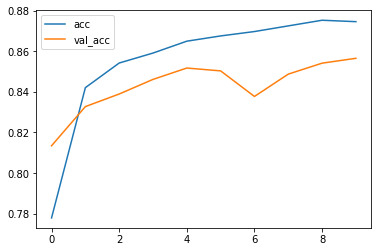

In [ ]:
# Plotting Accuracy and Validation Accuracy:
dnn_history[['acc', 'val_acc']].plot.line();

#Convolutional Neural Networks:

In [ ]:
# Reshaping the Features:
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

In [ ]:
# Passing the Train and Test Data through the Data Slicer Pipeline:
train_cnn_data = data_slicer(x_train_cnn, y_train)
test_cnn_data = data_slicer(x_test_cnn, y_test)

In [ ]:
# Defining the Convolutional Neural Networks Model:
cnn_model = tf.keras.Sequential([
                                 tf.keras.layers.Input([28, 28, 1]),
                                 tf.keras.layers.Conv2D(8, 3, 1, padding='same', activation='relu'),
                                 tf.keras.layers.MaxPool2D((2, 2)),
                                 tf.keras.layers.Conv2D(16, 3, 1, padding='same', activation='relu'),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dropout(.1),
                                 tf.keras.layers.Dense(128, activation='relu'),
                                 tf.keras.layers.Dropout(.1),
                                 tf.keras.layers.Dense(32, activation='relu'),
                                 tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compiling the Model:
cnn_model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(),
                  metrics=['acc'])

In [ ]:
# Fitting the Model:
cnn_model.fit(train_cnn_data, epochs=50, verbose=0, validation_data=test_cnn_data)

In [ ]:
# Extracting the History Data of the Model:
cnn_history = pd.DataFrame(cnn_model.history.history)
cnn_history.tail()

,loss,acc,val_loss,val_acc
45,0.028038,0.989833,0.529221,0.9186
46,0.025469,0.991550,0.564850,0.9124
47,0.027168,0.990833,0.517322,0.9166
48,0.028377,0.990167,0.537412,0.9140
49,0.026985,0.990517,0.540967,0.9142


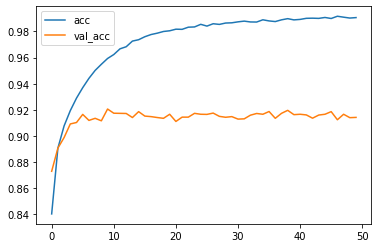

In [ ]:
# Plotting the Accuracy and Validation Accuracy of the Model:
cnn_history[['acc', 'val_acc']].plot.line()